# <center> Unsupervised Learning Methods </center>
## <center> Lecture 4 - Principal Component Analysis</center>
### <center> PCA</center>

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 16})

# np.random.seed(2)

### (Quick) PCA with Scikit-learn

##### Load the breast cancer data (classification):

In [2]:
from sklearn.datasets import load_breast_cancer

mX, vY = load_breast_cancer(return_X_y=True)

mX.shape, vY.shape

((569, 30), (569,))

##### Normalize the data and apply PCA:
From $\mathbb{R}^{30}$ to $\mathbb{R}^{2}$.

In [3]:
from sklearn.decomposition import PCA

mX -= mX.mean(0)
mX /= mX.std(0)
mZ  = PCA(n_components=2).fit_transform(mX)

##### Plot embeddings (low-dimensional representation):

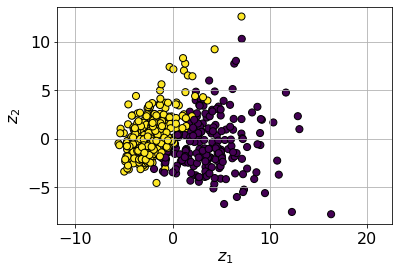

In [4]:
plt.scatter(mZ[:,0], mZ[:,1], c=vY, s=50, edgecolor='k')
plt.xlabel('$z_1$')
plt.ylabel('$z_2$')
plt.axis('equal')
plt.grid()
plt.show()

### PCA implementation
##### Get the face dataset:

In [5]:
from sklearn.datasets import fetch_olivetti_faces

mX, _ = fetch_olivetti_faces(return_X_y=True)
N, D  = mX.shape
vSize = (64, 64)
mX.shape

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\baralon\scikit_learn_data


(400, 4096)

##### Plot some examples:

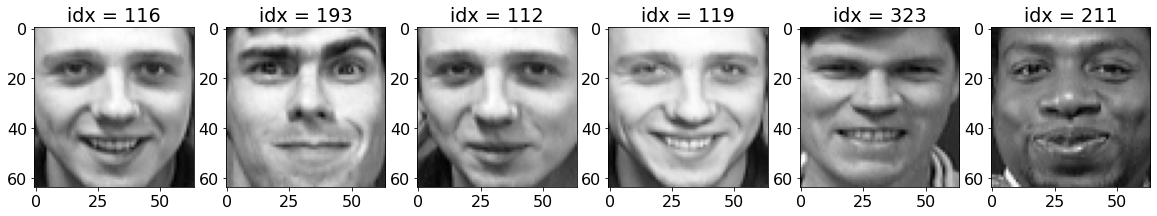

In [6]:
K = 6
_, ax = plt.subplots(1, K, figsize=(20, 6))
for kk in range(K):
    idx = np.random.choice(N)
    mI  = np.reshape(mX[idx,:], vSize)
    
    ax[kk].imshow(mI, cmap='gray')
    ax[kk].set_title('idx = ' + str(idx))
plt.show()

##### Compute mean face:

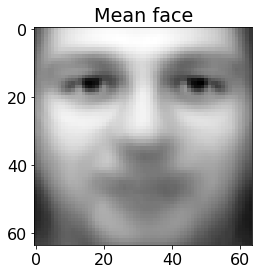

In [10]:
vMean = np.mean(mX, 0)

mI = np.reshape(vMean, vSize)
plt.figure()
plt.imshow(mI, cmap='gray')
plt.title('Mean face')
plt.show()

##### Remove the mean:

In [13]:
mRawX, _ = fetch_olivetti_faces(return_X_y=True)
mX       = mRawX - np.mean(mRawX, axis=0) 

$\Sigma$

### Compute eigenvectors and eigenvalues:
Using EIG:
$$\boldsymbol{\Sigma}_{x}=\boldsymbol{X}\boldsymbol{X}^{T}=\boldsymbol{U}\boldsymbol{\Lambda}\boldsymbol{U}^{T}$$
Using SVD:
$$\boldsymbol{X}=\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^{T}$$
$$\boldsymbol{\Lambda}=\boldsymbol{\Sigma}^{2}$$


In [15]:
import time

startTime = time.time()

#------------------------------
#-- EIG:
mSig     = mX.T @ mX           #-- Covariance of X (dimensions are swapped).
vLam, mU = np.linalg.eig(mSig) #-- also need to sort eigenvalues..
#------------------------------

endTime = time.time()

print(f'Time: {endTime - startTime}')
mU.shape, vLam.shape

Time: 58.602229833602905


((4096, 4096), (4096,))

In [10]:
mSig.shape

(4096, 4096)

In [17]:
startTime = time.time()

#-----------------------------------------------------
#-- Compact SVD:
mU, vS, _  = np.linalg.svd(mX.T, full_matrices=False)
vLam       = vS**2
#-----------------------------------------------------

endTime = time.time()
print(f'Time: {endTime - startTime}')

mU.shape

Time: 0.14860177040100098


(4096, 400)

#### Plot some eigenvectors (as images):

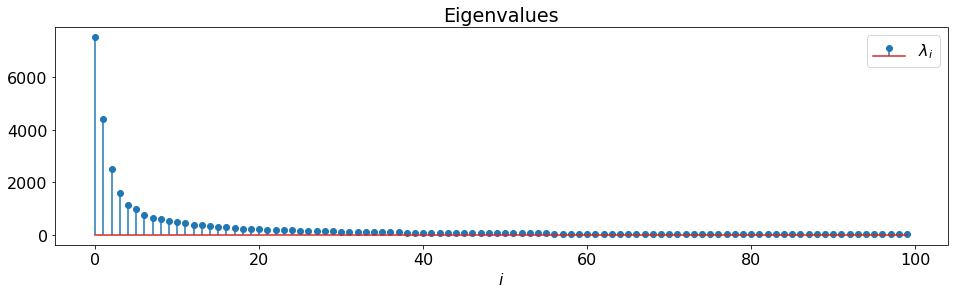

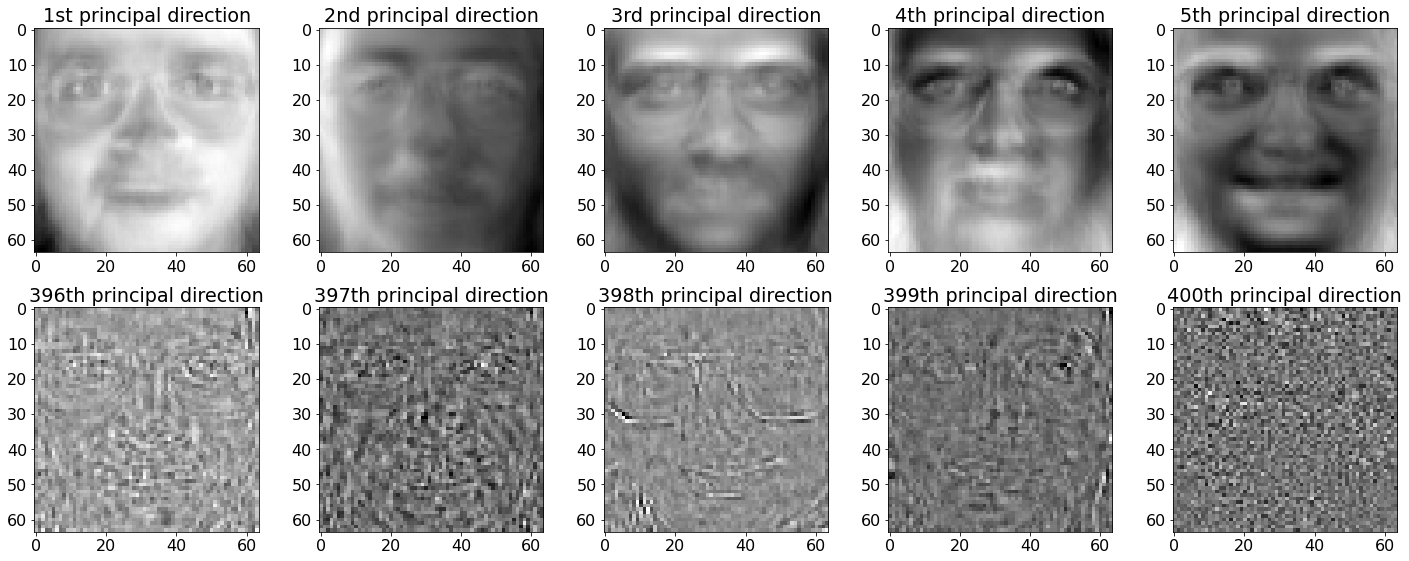

In [18]:
import math
ordinal = lambda n: "%d%s" % (n,"tsnrhtdd"[(math.floor(n/10)%10!=1)*(n%10<4)*n%10::4])

plt.figure(figsize=(16, 4))
plt.stem(vLam[:100], use_line_collection=True, label='$\lambda_i$')
plt.title('Eigenvalues')
plt.xlabel('$i$')
plt.legend()

fig, _ = plt.subplots(2, 5, figsize=(20,8))
vIdx   = list(range(5)) + list(range(395, 400))
for kk, ax in zip(range(10), fig.axes):
    idx = vIdx[kk]
    mI  = np.reshape(mU.T[idx,:], vSize)
    ax.imshow(mI, cmap='gray')
    ax.set_title(ordinal(idx+1) + ' principal direction')
    
plt.tight_layout()
plt.show()

### Reconstruction plot:

$$\boldsymbol{z}_{i}=\phi_{\text{PCA}}\left(\boldsymbol{x}_{i}\right)=\boldsymbol{U}_{d}^{T}\boldsymbol{x}_{i}$$  

$$\boldsymbol{\epsilon}_{i}=\boldsymbol{x}_{i}-\boldsymbol{U}_{d}\boldsymbol{z}_{i}=\boldsymbol{x}_{i}-\boldsymbol{U}_{d}\boldsymbol{U}_{d}^{T}\boldsymbol{x}_{i}$$

In [16]:
idx   = 360
# idx   = 2
vRawX = mRawX[idx,:]
vX    = mX[idx,:]
def PlotReconstruction(d):
    
    if d > 0:
        mUd   = mU[:,:d]
        vZ    = mUd.T @ vX.T
        vHatX = (mUd @ vZ) + vMean
    else:
        vZ    = [0]
        vHatX = vMean
        
    mI   = np.reshape(vRawX,   vSize)
    mRec = np.reshape(vHatX.T, vSize)

    plt.figure(figsize=(12,8))
    plt.subplot(2,1,1)
    plt.stem(vZ, use_line_collection=True, label='coefficients')
    plt.xlabel('idx')
    plt.legend()
    
    plt.subplot(2,2,3)
    plt.imshow(mI,   cmap='gray')
    plt.title('Original')
    plt.subplot(2,2,4)
    plt.imshow(mRec, cmap='gray')
    plt.title('Reconstruction, d = ' + str(d))
    plt.tight_layout()

In [14]:
from ipywidgets import interact, IntSlider, Layout

dSlider = IntSlider(min=0, max=400, step=1, value=0, layout=Layout(width='80%'))
interact(PlotReconstruction, d=dSlider)
plt.show()

interactive(children=(IntSlider(value=0, description='d', layout=Layout(width='80%'), max=400), Output()), _do…

$$\boldsymbol{z}=\left[\begin{matrix}z_{1}\\
z_{2}\\
z_{3}\\
z_{4}\\
z_{5}
\end{matrix}\right]$$  

$$\hat{\boldsymbol{x}}=\boldsymbol{U}_{d}\boldsymbol{z}+\boldsymbol{\mu}_{x}$$

In [15]:
from ipywidgets import interact, FloatSlider, Layout

idx   = 0
d     = 5
mUd   = mU[:,:d]
vC    = mUd.T @ mX[idx,:]

def PlotImage(z1, z2, z3, z4, z5):
    
    vZ    = np.array([z1, z2, z3, z4, z5])
    vHatX = mUd @ vZ + vMean
    mRec  = np.reshape(vHatX.T, vSize)

    plt.figure()
    plt.imshow(mRec, cmap='gray')

c1Slider = FloatSlider(min=-5, max=7, step=.1, value=vC[0], layout=Layout(width='80%'))
c2Slider = FloatSlider(min=-5, max=7, step=.1, value=vC[1], layout=Layout(width='80%'))
c3Slider = FloatSlider(min=-5, max=7, step=.1, value=vC[2], layout=Layout(width='80%'))
c4Slider = FloatSlider(min=-5, max=7, step=.1, value=vC[3], layout=Layout(width='80%'))
c5Slider = FloatSlider(min=-5, max=7, step=.1, value=vC[4], layout=Layout(width='80%'))
interact(PlotImage, z1=c1Slider, z2=c2Slider, z3=c3Slider, z4=c4Slider, z5=c5Slider)
plt.show()

interactive(children=(FloatSlider(value=6.432613372802734, description='z1', layout=Layout(width='80%'), max=7…

##### Scikit-learn PCA:

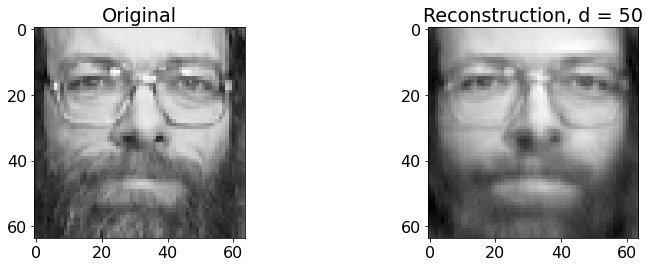

In [21]:
from sklearn.decomposition import PCA

idx   = 360
d     = 50
oPCA  = PCA(n_components=d).fit(mRawX)
vZ    = oPCA.transform(mRawX[[idx],:])
vHatX = oPCA.inverse_transform(vZ)

mI   = np.reshape(mRawX[idx,:], vSize)
mRec = np.reshape(vHatX.T,      vSize)

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1); plt.imshow(mI,   cmap='gray'); plt.title('Original')
plt.subplot(1,2,2); plt.imshow(mRec, cmap='gray'); plt.title('Reconstruction, d = ' + str(d))
plt.tight_layout()